In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
df  = pd.read_csv("blinkit_data.csv")

In [4]:
df.head()

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2010,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2000,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0


In [7]:
df.shape

(8523, 12)

In [ ]:
df.describe()

In [11]:
df.columns

Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Sales', 'Rating'],
      dtype='object')

In [13]:
df.dtypes

Item Fat Content              object
Item Identifier               object
Item Type                     object
Outlet Establishment Year      int64
Outlet Identifier             object
Outlet Location Type          object
Outlet Size                   object
Outlet Type                   object
Item Visibility              float64
Item Weight                  float64
Sales                        float64
Rating                       float64
dtype: object

In [9]:
print(df['Item Fat Content'].unique())

['Regular' 'Low Fat']


In [6]:
df['Item Fat Content'] = df['Item Fat Content'].replace({'LF':'Low Fat',
                                                         'low fat': 'Low Fat'})

In [8]:
df['Item Fat Content'] = df['Item Fat Content'].replace({'reg' : 'Regular'})

BUSINESS REQUIREMENTS 

KPI's REQUIREMENTS

In [24]:
total_sales = df['Sales'].sum()
avg_sales = df['Sales'].mean()
no_of_itmes_sold = df['Sales'].count()
avg_rating = df['Rating'].mean()

print(f'Total Sales: ${total_sales:,.1f}')
print(f'Average Sales: ${avg_sales:,.0f}')
print(f'Number of itmes Sold: {no_of_itmes_sold:,}')
print(f'Average Rating: {avg_rating:,.0f}')

Total Sales: $1,201,681.5
Average Sales: $141
Number of itmes Sold: 8,523
Average Rating: 4


TOTAL SALES BY FAT CONTENT

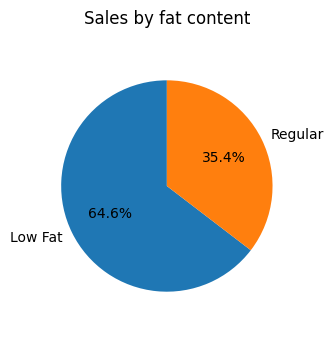

In [38]:
sales_by_fat = df.groupby('Item Fat Content')['Sales'].sum()
plt.figure(figsize=(3,4))
plt.pie(sales_by_fat, labels = sales_by_fat.index, autopct = '%.1f%%' , startangle = 90 )
plt.title('Sales by fat content')
plt.axis('equal')
plt.show()


TOTAL SALES BY ITEM TYPE

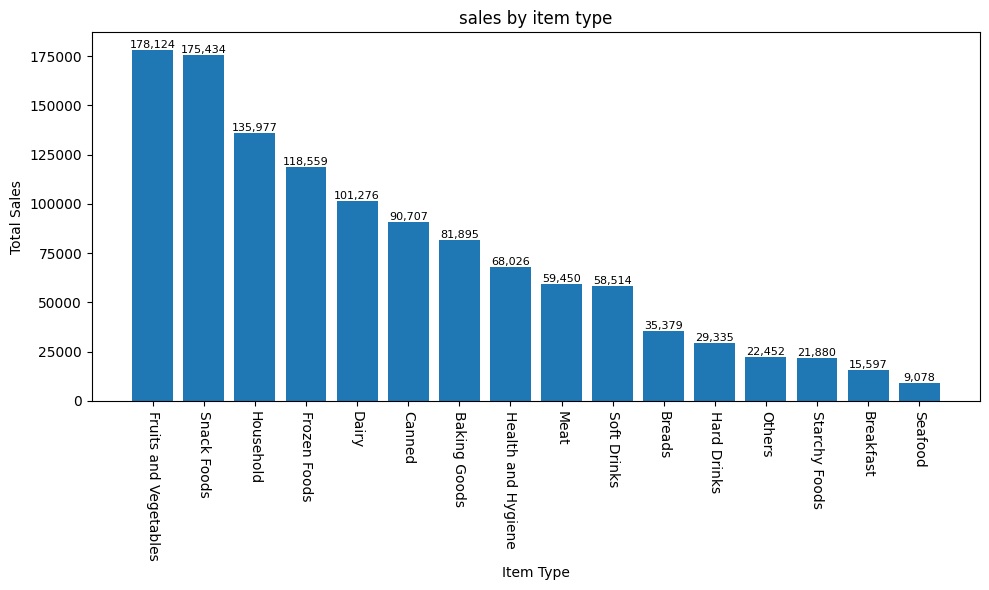

In [60]:
sales_by_item_type = df.groupby('Item Type')['Sales'].sum().sort_values(ascending = False)

plt.figure(figsize=(10,6))

bars = plt.bar(sales_by_item_type.index, sales_by_item_type.values)


plt.xticks(rotation = -90)
plt.xlabel('Item Type')
plt.ylabel('Total Sales')
plt.title("sales by item type")



for bar in bars:
 plt.text(bar.get_x() + bar.get_width()/2 , bar.get_height(),
          f'{bar.get_height():,.0f}', ha = 'center', va = 'bottom' ,fontsize = 8 )

plt.tight_layout()
plt.show()

FAT CONTNET BY OUTLET FOR TOTAL SALES

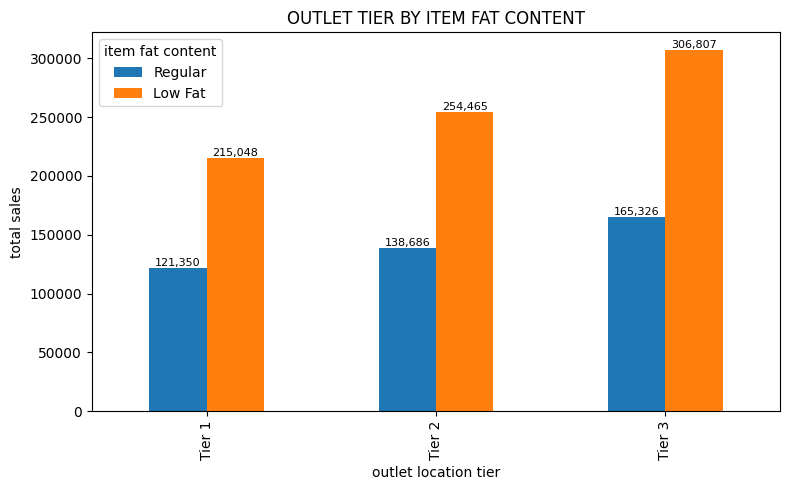

In [77]:
grouped = df.groupby(['Outlet Location Type' , 'Item Fat Content'])['Sales'].sum().unstack()
grouped = grouped[['Regular' , 'Low Fat']]

ax = grouped.plot(kind = 'bar' , figsize = (8,5), title  = 'OUTLET TIER BY ITEM FAT CONTENT')
plt.xlabel('outlet location tier')
plt.ylabel('total sales')
plt.legend( title = 'item fat content')


for container in ax.containers:
 for bar in container:
  height = bar.get_height()
  ax.text(bar.get_x() + bar.get_width()/2 , height ,
          f'{height:,.0f}', ha = 'center', va = 'bottom' ,fontsize = 8 )





plt.tight_layout()
plt.show()

